In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as stats1
import warnings
warnings.simplefilter('ignore')

In [2]:
data = pd.read_csv('census_data_encoded.csv')
data.drop(columns='Unnamed: 0',axis=1,inplace=True)
data.head()

,fnlwgt,edu-num,capital-gain,capital-loss,hrs-per-week,earnings,age,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Male
0,77516,13,2174,0,40,0,39,0,0,0,...,1,0,0,0,0,0,0,0,1,1
1,83311,13,0,0,13,0,50,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2,215646,9,0,0,40,0,38,0,0,0,...,1,0,0,0,0,0,0,0,1,1
3,234721,7,0,0,40,0,53,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,338409,13,0,0,40,0,28,0,0,0,...,0,0,0,0,1,0,1,0,0,0


# Train Test Split

In [3]:
X = data.drop('earnings', axis=1)
y = data['earnings']

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.33, random_state=32)

In [5]:
print("X_train row number :",X_train.shape[0])
print("X_test row number :",X_test.shape[0])
print("y_train row number :",y_train.shape[0])
print("y_test row number :",y_test.shape[0])

X_train row number : 21297
X_test row number : 10490
y_train row number : 21297
y_test row number : 10490


In [6]:
data.earnings.value_counts()

0    24155
1     7632
Name: earnings, dtype: int64

# Scaling Data

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Pickiling Model

In [8]:
import pickle

pickle.dump(scaler, open('StdScaler.pkl','wb'))

In [9]:
# import pymongo
# import time
# def save_model_to_db(model,client,db,conn,model_name):
#     pkl_model = pickle.dumps(model)
#     myclient = pymongo.MongoClient(client)
#     mydb = myclient[db]
#     myconn = mydb[conn]
#     info = myconn.insert_one({model_name:pkl_model,'name':model_name
#                               ,'created_time':time.time()})
#     print(info.inserted_id,'saved successfully with this id')
#     details = {
#         'inserted_id' : info.inserted_id,
#         'model_name' : model_name,
#         'created_time' : time.time()
#     }
#     return details

# Logistic Regression

In [10]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

In [11]:
log_reg.fit(X_train,y_train)

LogisticRegression()

In [12]:
ypred_log_reg = log_reg.predict(X_test)

In [13]:
log_reg.score(X_test,y_test)

0.8445185891325071

In [14]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,ypred_log_reg)

0.8445185891325071

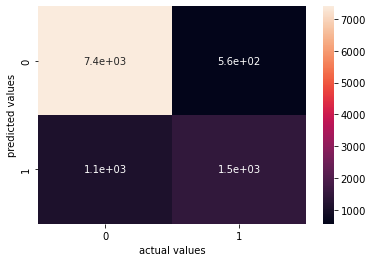

In [15]:
from sklearn.metrics import confusion_matrix as cm

sns.heatmap(cm(y_test,ypred_log_reg),annot=True)
plt.xlabel('actual values')
plt.ylabel('predicted values')
plt.show()

# Support Vector Classifier

### SCV linear

In [16]:
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC

svc_lin = make_pipeline(StandardScaler(), SVC(kernel='linear',gamma='auto'))
svc_lin.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto', kernel='linear'))])

In [17]:
ypred_scv_lin = svc_lin.predict(X_test)

In [18]:
svc_lin.score(X_test,y_test)

0.8445185891325071

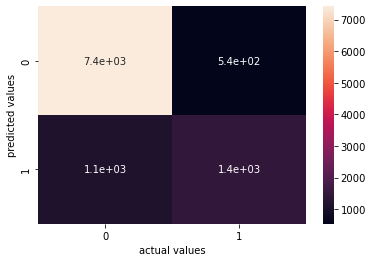

In [19]:
sns.heatmap(cm(y_test,ypred_scv_lin),annot=True)
plt.xlabel('actual values')
plt.ylabel('predicted values')
plt.show()

### SVC Polynomial

In [20]:
svc_poly = make_pipeline(StandardScaler(), SVC(kernel='poly',gamma='auto'))
svc_poly.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto', kernel='poly'))])

In [21]:
ypred_scv_poly = svc_poly.predict(X_test)

In [22]:
svc_poly.score(X_test,y_test)

0.8390848427073403

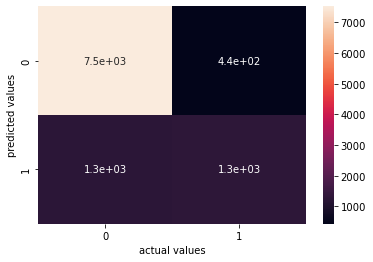

In [23]:
sns.heatmap(cm(y_test,ypred_scv_poly),annot=True)
plt.xlabel('actual values')
plt.ylabel('predicted values')
plt.show()

### SVC rbf

In [24]:
svc_rbf = make_pipeline(StandardScaler(), SVC(kernel='rbf',gamma='auto'))
svc_rbf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [25]:
ypred_scv_rbf = svc_rbf.predict(X_test)

In [26]:
svc_rbf.score(X_test,y_test)

0.8484270734032412

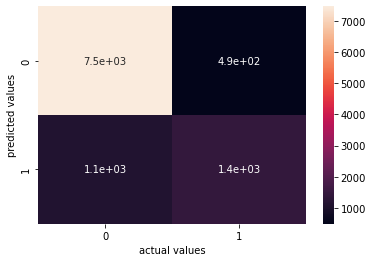

In [27]:
sns.heatmap(cm(y_test,ypred_scv_rbf),annot=True)
plt.xlabel('actual values')
plt.ylabel('predicted values')
plt.show()

### SVC Sigmoid

In [28]:
svc_sig = make_pipeline(StandardScaler(), SVC(kernel='sigmoid',gamma='auto'))
svc_sig.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto', kernel='sigmoid'))])

In [29]:
ypred_scv_sig = svc_sig.predict(X_test)

In [30]:
svc_sig.score(X_test,y_test)

0.7839847473784557

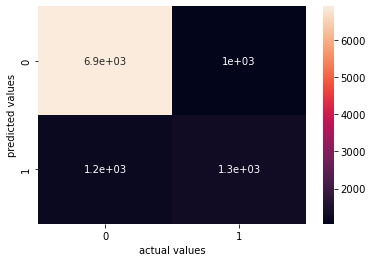

In [31]:
sns.heatmap(cm(y_test,ypred_scv_sig),annot=True)
plt.xlabel('actual values')
plt.ylabel('predicted values')
plt.show()

# Using GridSearchCV

In [32]:
grid_param = {
    'criterion': ['memory', 'steps', 'verbose'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
    
}

In [33]:
from sklearn.model_selection import GridSearchCV
gs_lin = GridSearchCV(estimator=svc_lin,param_grid=grid_param,cv=5)

In [34]:
gs_lin.fit(X_train,y_train)

ValueError: Invalid parameter 'criterion' for estimator Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto', kernel='linear'))]). Valid parameters are: ['memory', 'steps', 'verbose'].

In [35]:
gs_lin.param_grid

{'criterion': ['memory', 'steps', 'verbose'],
 'max_depth': range(2, 32),
 'min_samples_leaf': range(1, 10),
 'min_samples_split': range(2, 10),
 'splitter': ['best', 'random']}